In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
data = pd.read_csv('train_socgenCredit.csv')
data.head()
data_test = pd.read_csv('socgenCredit_test.csv')

In [40]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
S.No,7417.0,5.259912e+03,3.061219e+03,1.00000,2614.00000,5.242000e+03,7.896000e+03,1.059600e+04
Outcome,7417.0,9.683160e-01,1.751692e-01,0.00000,1.00000,1.000000e+00,1.000000e+00,1.000000e+00
JA_SCORE,7417.0,4.237633e-02,3.073497e-02,0.00172,0.01735,3.574000e-02,6.089000e-02,1.771900e-01
FR_SCORE,7417.0,1.102221e-01,7.743555e-02,0.00340,0.04679,9.471000e-02,1.602200e-01,3.130800e-01
BWA_SCORE,7417.0,5.271210e-02,4.641267e-02,0.00000,0.01339,4.238000e-02,8.337000e-02,2.141200e-01
GESAMT_SCORE,7417.0,6.909349e-02,4.264940e-02,0.00461,0.03654,5.698000e-02,9.868000e-02,1.926000e-01
PD,7417.0,7.141056e-02,4.987084e-02,0.00340,0.02760,6.280000e-02,1.101000e-01,1.872000e-01
Ertrag_marge,7417.0,4.734704e+03,9.651009e+03,0.00000,0.00000,1.784150e+03,5.703380e+03,1.252977e+05
start_EAD,7417.0,1.339280e+05,2.805008e+05,0.00000,0.00000,6.316000e+04,1.700000e+05,4.996400e+06
LGD_rest_Ecosfera_avg,7417.0,6.356014e-02,7.125580e-02,0.00000,0.00000,3.802000e-02,1.163500e-01,4.267000e-01


In [41]:
data_test.dtypes.value_counts()

float64    20
int64       7
object      2
dtype: int64

In [42]:
data.dtypes.value_counts()

float64    20
int64       8
object      2
dtype: int64

In [43]:
data.head()

,S.No,Outcome,JA_SCORE,FR_SCORE,BWA_SCORE,GESAMT_SCORE,krf,PD,Ertrag_marge,start_EAD,...,EIP_PBLANKO,EIP_BSG,EIP_PBSG,EIP_GESAMTENGA,EIP_PROTONEUENGA,EIP_PROTONEUSICHERHEITEN,EIP_EWB,V_VOTIERUNGSDATUM,SRK_LGD_rest_Ecosfera_avg,SRK_LGD_12_Ecosfera
0,4025,1,0.08636,0.06065,0.12565,0.04576,6,0.0628,3147.89,97360.94,...,1015494.98,0.0087,0.0164,1300000.00,97360.94,9736.09,0,24MAR2014:13:57:22.859000,0.016119,0.018047
1,3328,1,0.03031,0.02178,0.03006,0.02709,5,0.0276,30413.31,864000.00,...,96005.30,1.1335,0.9386,1635849.97,0.00,0.00,0,17DEC2015:10:57:44.809000,0.001045,0.001861
2,3152,1,0.01203,0.12523,0.01584,0.05491,7+,0.1101,9214.00,210000.00,...,31817.53,0.9181,0.9181,388547.03,210000.00,147000.00,0,07MAY2014:10:22:17.362000,0.019492,0.023763
3,6879,1,0.06280,0.07029,0.00000,0.04874,6-,0.0834,0.00,0.00,...,0.00,0.0000,0.0000,740000.00,0.00,0.00,0,30DEC2015:09:58:32.782000,0.000000,0.000000
4,2952,1,0.00994,0.12523,0.01851,0.05483,7+,0.1101,715.21,21700.00,...,28879.54,0.7820,0.6742,330827.07,21700.00,13801.20,0,27SEP2012:09:33:57.120000,0.003093,0.001744


In [44]:
data.columns

Index(['S.No', 'Outcome', 'JA_SCORE', 'FR_SCORE', 'BWA_SCORE', 'GESAMT_SCORE',
       'krf', 'PD', 'Ertrag_marge', 'start_EAD', 'LGD_rest_Ecosfera_avg',
       'LGD_12_Ecosfera', 'bonitaetsindex', 'std_krediturteil', 'VC_umsatz',
       'default', 'v_verlust_aug', 'verlust', 'A_FLAG_NEUGESCHAEFT',
       'EIP_BLANKO', 'EIP_PBLANKO', 'EIP_BSG', 'EIP_PBSG', 'EIP_GESAMTENGA',
       'EIP_PROTONEUENGA', 'EIP_PROTONEUSICHERHEITEN', 'EIP_EWB',
       'V_VOTIERUNGSDATUM', 'SRK_LGD_rest_Ecosfera_avg',
       'SRK_LGD_12_Ecosfera'],
      dtype='object')

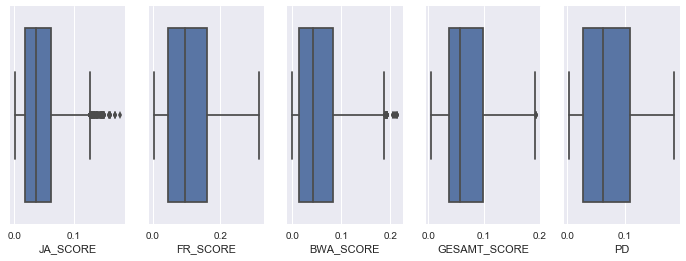

In [80]:
fig, axs = plt.subplots(ncols=5,figsize=(12,4))
sns.boxplot(x="JA_SCORE", data=data, ax=axs[0])
sns.boxplot(x="FR_SCORE", data=data, ax=axs[1])
sns.boxplot(x="BWA_SCORE", data=data, ax=axs[2])
sns.boxplot(x="GESAMT_SCORE", data=data, ax=axs[3])
sns.boxplot(x="PD", data=data, ax=axs[4])

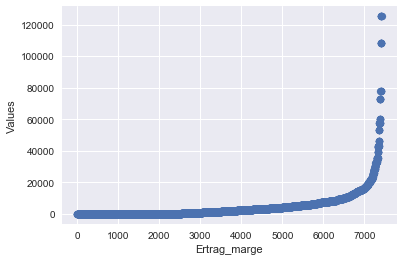

In [82]:
plt.scatter(range(data.shape[0]), np.sort(data.Ertrag_marge.values))
plt.xlabel('Ertrag_marge')
plt.ylabel('Values')

In [1]:
plt.scatter(range(train.shape[0]), np.sort(train.start_EAD.values))
plt.xlabel('Ertrag_marge')
plt.ylabel('Values')

NameError: name 'plt' is not defined

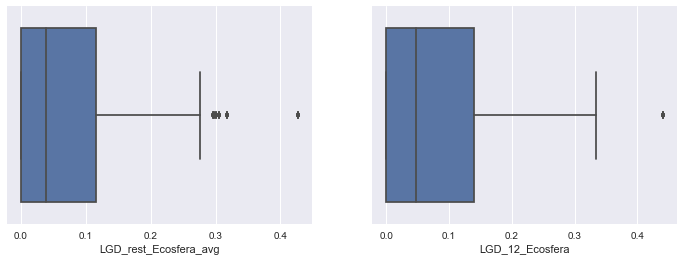

In [84]:
fig, axs = plt.subplots(ncols=2,figsize=(12,4))
sns.boxplot(x="LGD_rest_Ecosfera_avg", data=data, ax=axs[0])
sns.boxplot(x="LGD_12_Ecosfera", data=data, ax=axs[1])

In [85]:
data.columns

Index(['S.No', 'Outcome', 'JA_SCORE', 'FR_SCORE', 'BWA_SCORE', 'GESAMT_SCORE',
       'krf', 'PD', 'Ertrag_marge', 'start_EAD', 'LGD_rest_Ecosfera_avg',
       'LGD_12_Ecosfera', 'bonitaetsindex', 'std_krediturteil', 'VC_umsatz',
       'default', 'v_verlust_aug', 'verlust', 'A_FLAG_NEUGESCHAEFT',
       'EIP_BLANKO', 'EIP_PBLANKO', 'EIP_BSG', 'EIP_PBSG', 'EIP_GESAMTENGA',
       'EIP_PROTONEUENGA', 'EIP_PROTONEUSICHERHEITEN', 'EIP_EWB',
       'V_VOTIERUNGSDATUM', 'SRK_LGD_rest_Ecosfera_avg',
       'SRK_LGD_12_Ecosfera'],
      dtype='object')

In [ ]:
'bonitaetsindex', 'std_krediturteil', 'VC_umsatz'

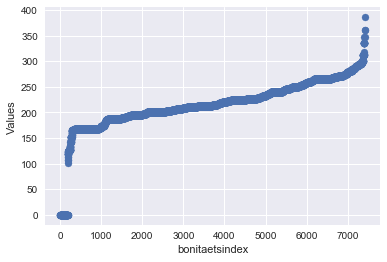

In [86]:
plt.scatter(range(data.shape[0]), np.sort(data.bonitaetsindex.values))
plt.xlabel('bonitaetsindex')
plt.ylabel('Values')

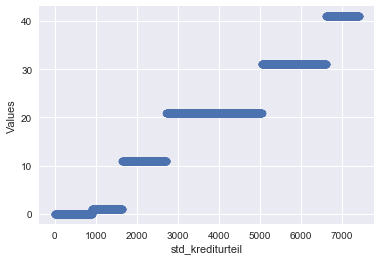

In [87]:
plt.scatter(range(data.shape[0]), np.sort(data.std_krediturteil.values))
plt.xlabel('std_krediturteil')
plt.ylabel('Values')

In [88]:
data[data.std_krediturteil<10]['std_krediturteilnew']=0

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [91]:
data[data.std_krediturteil<20][data.std_krediturteil>=10]['std_krediturteilnew']=10
data[data.std_krediturteil<30][data.std_krediturteil>=20]['std_krediturteilnew']=20
data[data.std_krediturteil<40][data.std_krediturteil>=30]['std_krediturteilnew']=30
data[data.std_krediturteil<50][data.std_krediturteil>=40]['std_krediturteilnew']=40

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [93]:
data.groupby('std_krediturteilnew')['Outcome'].count()

KeyError: 'std_krediturteilnew'

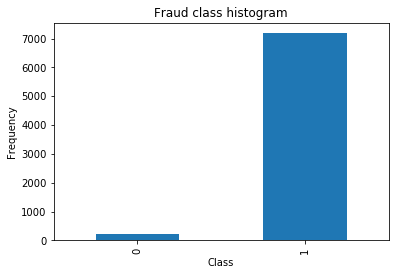

In [32]:
import matplotlib.pyplot as plt
count_classes = pd.value_counts(data['Outcome'], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("Fraud class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")

In [33]:
data.columns

Index(['S.No', 'Outcome', 'JA_SCORE', 'FR_SCORE', 'BWA_SCORE', 'GESAMT_SCORE',
       'krf', 'PD', 'Ertrag_marge', 'start_EAD', 'LGD_rest_Ecosfera_avg',
       'LGD_12_Ecosfera', 'bonitaetsindex', 'std_krediturteil', 'VC_umsatz',
       'default', 'v_verlust_aug', 'verlust', 'A_FLAG_NEUGESCHAEFT',
       'EIP_BLANKO', 'EIP_PBLANKO', 'EIP_BSG', 'EIP_PBSG', 'EIP_GESAMTENGA',
       'EIP_PROTONEUENGA', 'EIP_PROTONEUSICHERHEITEN', 'EIP_EWB',
       'V_VOTIERUNGSDATUM', 'SRK_LGD_rest_Ecosfera_avg',
       'SRK_LGD_12_Ecosfera'],
      dtype='object')

In [37]:
out1=data['JA_SCORE'][data['Outcome']==0].mean()
out2=data['JA_SCORE'][data['Outcome']==1].mean()
print(out1)
print(out2)

0.05720774468085101
0.041891034530771185


In [12]:
from sklearn.preprocessing import StandardScaler

data['Ertrag_marge'] = StandardScaler().fit_transform(data['Ertrag_marge'].reshape(-1, 1))
data['start_EAD'] = StandardScaler().fit_transform(data['start_EAD'].reshape(-1, 1))
data['std_krediturteil'] = StandardScaler().fit_transform(data['std_krediturteil'].reshape(-1, 1))
data['VC_umsatz'] = StandardScaler().fit_transform(data['VC_umsatz'].reshape(-1, 1))
data['EIP_BLANKO'] = StandardScaler().fit_transform(data['EIP_BLANKO'].reshape(-1, 1))
data['EIP_GESAMTENGA'] = StandardScaler().fit_transform(data['EIP_GESAMTENGA'].reshape(-1, 1))
data['EIP_PROTONEUENGA'] = StandardScaler().fit_transform(data['EIP_PROTONEUENGA'].reshape(-1, 1))
data['EIP_PROTONEUSICHERHEITEN'] = StandardScaler().fit_transform(data['EIP_PROTONEUSICHERHEITEN'].reshape(-1, 1))
# std_krediturteil
# VC_umsatz
# EIP_BLANKO
# EIP_PBLANKO
# EIP_GESAMTENGA
# EIP_PROTONEUENGA
# EIP_PROTONEUSICHERHEITEN
data.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: reshape is depreca

,S.No,Outcome,JA_SCORE,FR_SCORE,BWA_SCORE,GESAMT_SCORE,krf,PD,Ertrag_marge,start_EAD,...,EIP_PBLANKO,EIP_BSG,EIP_PBSG,EIP_GESAMTENGA,EIP_PROTONEUENGA,EIP_PROTONEUSICHERHEITEN,EIP_EWB,V_VOTIERUNGSDATUM,SRK_LGD_rest_Ecosfera_avg,SRK_LGD_12_Ecosfera
0,4025,1,0.08636,0.06065,0.12565,0.04576,6,0.0628,-0.164431,-0.130372,...,1015494.98,0.0087,0.0164,-0.008973,-0.095940,-0.381160,0,24MAR2014:13:57:22.859000,0.016119,0.018047
1,3328,1,0.03031,0.02178,0.03006,0.02709,5,0.0276,2.660897,2.602920,...,96005.30,1.1335,0.9386,0.080020,-0.467412,-0.434929,0,17DEC2015:10:57:44.809000,0.001045,0.001861
2,3152,1,0.01203,0.12523,0.01584,0.05491,7+,0.1101,0.464158,0.271219,...,31817.53,0.9181,0.9181,-0.250490,0.333825,0.376900,0,07MAY2014:10:22:17.362000,0.019492,0.023763
3,6879,1,0.06280,0.07029,0.00000,0.04874,6-,0.0834,-0.490625,-0.477493,...,0.00,0.0000,0.0000,-0.157362,-0.467412,-0.434929,0,30DEC2015:09:58:32.782000,0.000000,0.000000
4,2952,1,0.00994,0.12523,0.01851,0.05483,7+,0.1101,-0.416512,-0.400126,...,28879.54,0.7820,0.6742,-0.265785,-0.384618,-0.358710,0,27SEP2012:09:33:57.120000,0.003093,0.001744


In [23]:
from sklearn.preprocessing import StandardScaler

data_test['Ertrag_marge'] = StandardScaler().fit_transform(data_test['Ertrag_marge'].reshape(-1, 1))
data_test['start_EAD'] = StandardScaler().fit_transform(data_test['start_EAD'].reshape(-1, 1))
data_test['std_krediturteil'] = StandardScaler().fit_transform(data_test['std_krediturteil'].reshape(-1, 1))
data_test['VC_umsatz'] = StandardScaler().fit_transform(data_test['VC_umsatz'].reshape(-1, 1))
data_test['EIP_BLANKO'] = StandardScaler().fit_transform(data_test['EIP_BLANKO'].reshape(-1, 1))
data_test['EIP_GESAMTENGA'] = StandardScaler().fit_transform(data_test['EIP_GESAMTENGA'].reshape(-1, 1))
data_test['EIP_PROTONEUENGA'] = StandardScaler().fit_transform(data_test['EIP_PROTONEUENGA'].reshape(-1, 1))
data_test['EIP_PROTONEUSICHERHEITEN'] = StandardScaler().fit_transform(data_test['EIP_PROTONEUSICHERHEITEN'].reshape(-1, 1))
# std_krediturteil
# VC_umsatz
# EIP_BLANKO
# EIP_PBLANKO
# EIP_GESAMTENGA
# EIP_PROTONEUENGA
# EIP_PROTONEUSICHERHEITEN
data_test.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: reshape is depreca

,S.No,JA_SCORE,FR_SCORE,BWA_SCORE,GESAMT_SCORE,krf,PD,Ertrag_marge,start_EAD,LGD_rest_Ecosfera_avg,...,EIP_PBLANKO,EIP_BSG,EIP_PBSG,EIP_GESAMTENGA,EIP_PROTONEUENGA,EIP_PROTONEUSICHERHEITEN,EIP_EWB,V_VOTIERUNGSDATUM,SRK_LGD_rest_Ecosfera_avg,SRK_LGD_12_Ecosfera
0,3,0.03116,0.05244,0.05787,0.04598,6,0.0628,-0.514431,-0.495255,0.0,...,0.00,1.4840,0.0000,-0.201080,-0.480865,-0.448209,0,05MAY2010:14:19:27.688000,0.0,0.0
1,4,0.01527,0.04165,0.06372,0.03763,6+,0.0473,-0.514431,-0.495255,0.0,...,617350.33,0.6322,0.6322,0.082838,-0.143456,-0.107025,0,12MAY2010:14:25:55.280000,0.0,0.0
2,6,0.02419,0.05244,0.02564,0.03502,6+,0.0473,-0.514431,-0.495255,0.0,...,76975.41,0.9225,0.8878,-0.162491,0.334843,0.435543,0,12MAY2010:14:52:46.429000,0.0,0.0
3,13,0.00313,0.05329,0.08713,0.04353,6,0.0628,-0.514431,-0.495255,0.0,...,0.00,0.7810,0.0000,-0.267544,0.318966,0.302801,0,14JUN2010:13:44:01.932000,0.0,0.0
4,18,0.00299,0.03341,0.05120,0.02678,5,0.0276,-0.514431,-0.495255,0.0,...,0.00,0.0000,0.0000,-0.222181,-0.480865,-0.448209,0,21JUN2010:15:11:39.716000,0.0,0.0


In [24]:
data = data.drop(['LGD_12_Ecosfera','EIP_BSG','SRK_LGD_12_Ecosfera', 'EIP_PROTONEUENGA','EIP_EWB', 'S.No'], axis=1)
data_test = data_test.drop(['LGD_12_Ecosfera','EIP_BSG','SRK_LGD_12_Ecosfera', 'EIP_PROTONEUENGA','EIP_EWB', 'S.No'], axis=1)

In [14]:
X = data.loc[:, data.columns != 'Outcome']
y = data.loc[:, data.columns == 'Outcome']

In [16]:
# Number of data points in the minority class
number_records_fraud = len(data[data.Outcome == 0])
fraud_indices = np.array(data[data.Outcome == 0].index)
                              
# Picking the indices of the normal classes
normal_indices = data[data.Outcome == 1].index
                              
                              
# Out of the indices we picked, randomly select "x" number (number_records_fraud)
random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace = False)
random_normal_indices = np.array(random_normal_indices)
                              
                              
# Appending the 2 indices
under_sample_indices = np.concatenate([fraud_indices,random_normal_indices])
                              
under_sample_data = data.iloc[under_sample_indices,:]
                              
X_undersample = under_sample_data.iloc[:, under_sample_data.columns != 'Outcome']
y_undersample = under_sample_data.iloc[:, under_sample_data.columns == 'Outcome']
                              
# Showing ratio
print("Percentage of normal transactions: ", len(under_sample_data[under_sample_data.Outcome == 1])/len(under_sample_data))
print("Percentage of fraud transactions: ", len(under_sample_data[under_sample_data.Outcome == 0])/len(under_sample_data))
print("Total number of transactions in resampled data: ", len(under_sample_data))

Percentage of normal transactions:  0.5
Percentage of fraud transactions:  0.5
Total number of transactions in resampled data:  470
